# Data Analysis and Model Building(Deposit prediction)-Bank Marketting Campaign

This is a Classic Bank Marketting Dataset uploaded orginally in the UCI machine learning Repository.The Dataset gives you information about a marketting campaign of financial institution in which you will have to analyse in order to find ways to look  future strategies in order to improve future marketting campaigns for the bank.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("bank.csv")

In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,0,unknown,no


In [5]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,11,other,no


In [6]:
#Check df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  deposit    45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [7]:
#find rows and columns
df.shape

(45211, 16)

In [8]:
#Describe numerical columns
df.describe()

,age,balance,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,275.000000


In [9]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


# feature
1 age|int64|age in years

2 job|object|type of job('management' 'technician' 'entrepreneur' 'blue-collar' 'unknown','retired' 'admin.'   'services' 'self-employed' 'unemployed' 'housemaid''student')

3 marital|object|marital status('married' 'single' 'divorced')

4 education|Object|education background('tertiary' 'secondary' 'unknown' 'primary')

5 default|object|has credit in default('no' 'yes')

6 balance|int64|Balance of the individual

7 Housing|object|has housing loan('no' 'yes')

8 Loan|object|has a personal loan('no' 'yes')

9 contact|object|Contact communication type('unknown' 'cellular' 'telephone')

10 day|int 64|last contact day of week('mon'-'fri')

11 month|object|last contact month of year('may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep')

12 duration|int64|last contact duration in seconds

13 campaign|int64|number of contacts performed during this campaign

14 previous|int64|number of contacts performed during this campaign for this client

15 poutcome|object|outcome of the previous marketting campaign('unknown' 'failure' 'other' 'success')


Label

16 deposit|object|has the client subscribed a term deposit('no' 'yes')

In [10]:
#find missising values
features_na=[features for features in df.columns if df[features].isnull().sum()>0]
for features in features_na:
    print(feature,np.round(df[feature].isnull().mean(),4),'%missing values')
else:
    print("No missing value found")

No missing value found


In [11]:
#find features with one value
for column in df.columns:
    print(column,df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
previous 41
poutcome 4
deposit 2


In [12]:
#Categorical features
categorical_features=[feature for feature in df.columns if((df[feature].dtypes=='object')&(feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_features:
    print("the feature is{} and number of categories are{} ".format(feature,len(df[feature].unique())))

the feature isjob and number of categories are12 
the feature ismarital and number of categories are3 
the feature iseducation and number of categories are4 
the feature isdefault and number of categories are2 
the feature ishousing and number of categories are2 
the feature isloan and number of categories are2 
the feature iscontact and number of categories are3 
the feature ismonth and number of categories are12 
the feature ispoutcome and number of categories are4 


There are 9 categorical features.feature job and month has higherst categorical feature

In [14]:
j=df["age"].value_counts()

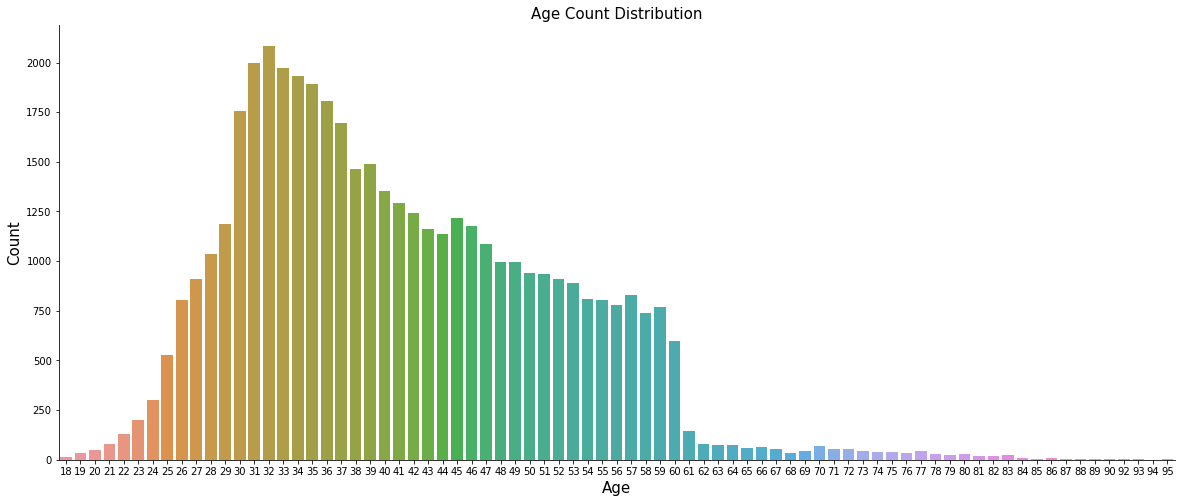

In [15]:
#7.Age count distribution
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

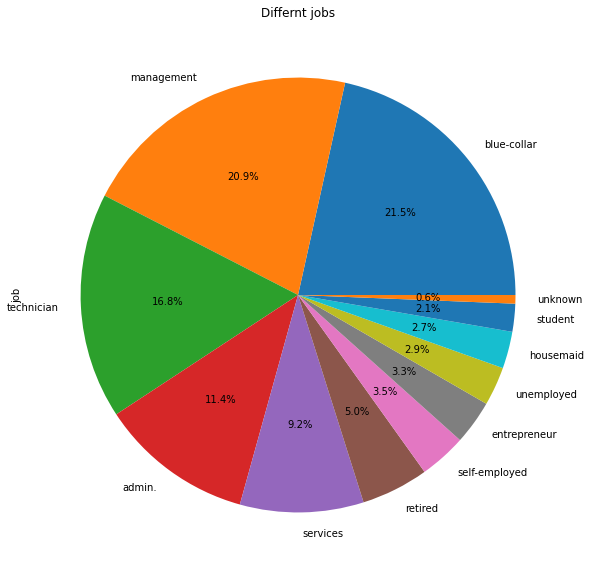

In [16]:
#count the jobs and show in piechart
j=df['job'].value_counts()
plt.figure(figsize=(15,10))

j.plot.pie(title="Differnt jobs",autopct='%1.1f%%')
plt.show()


/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


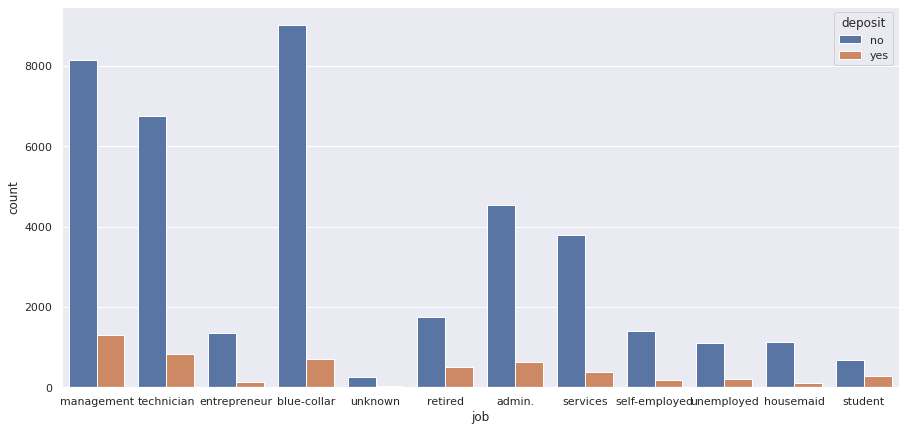

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,7))
sns.countplot(df['job'],hue='deposit',data=df)
plt.show()

#Find Categorical Feature Distribution

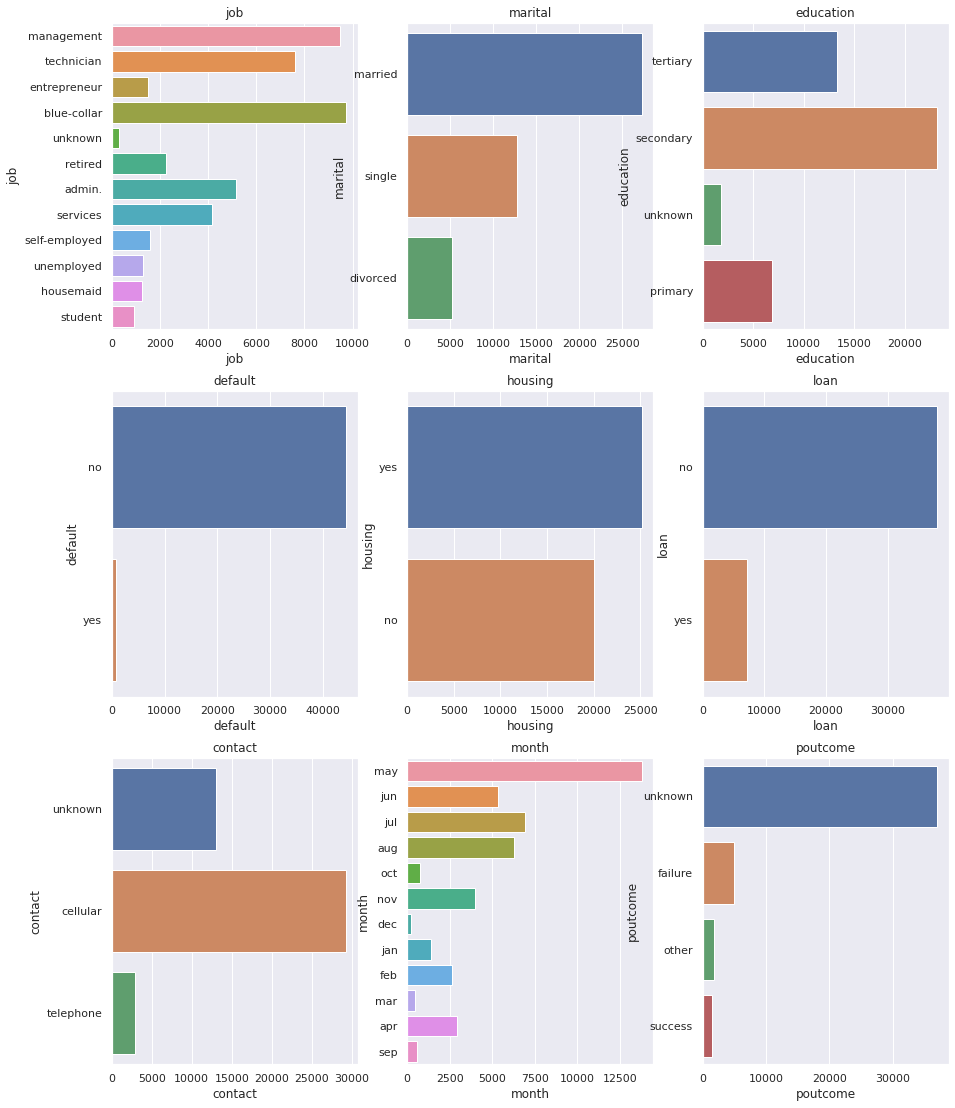

In [18]:
plt.figure(figsize=(15,80),facecolor="white")
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# Relationship between Categorical Features and Label

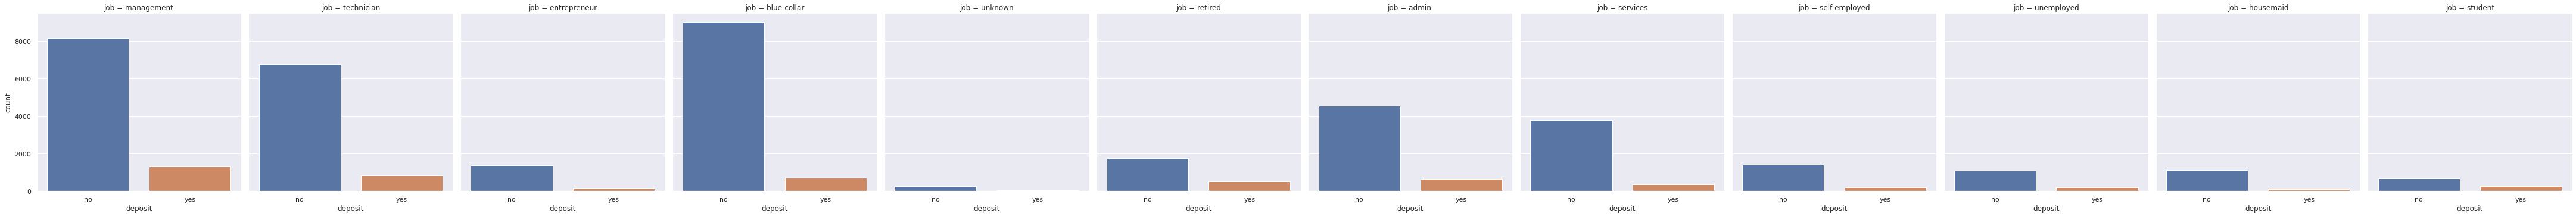

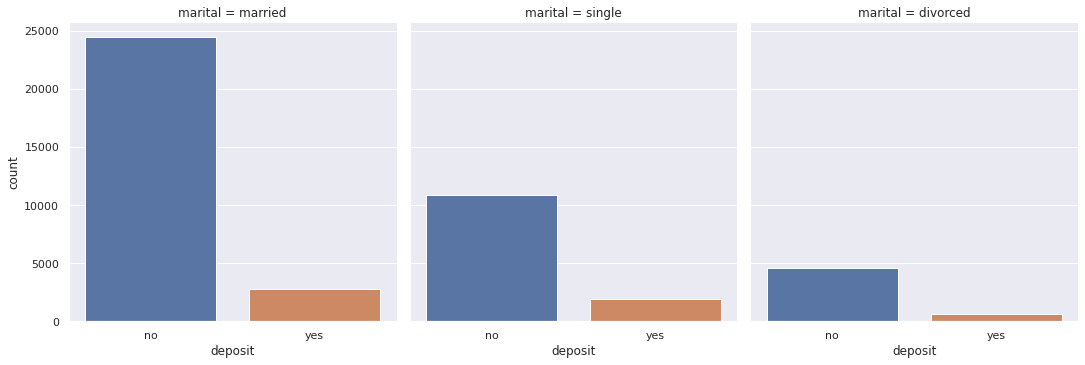

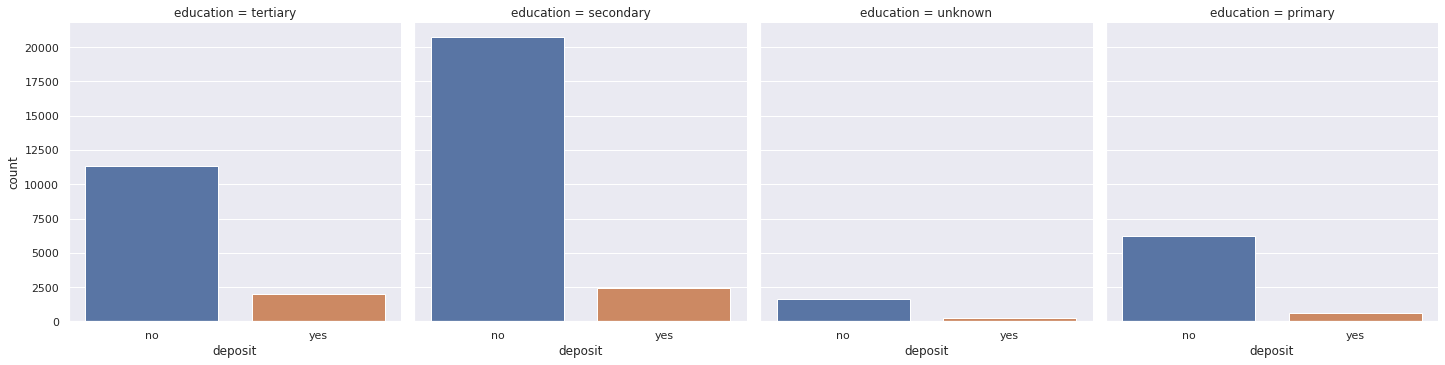

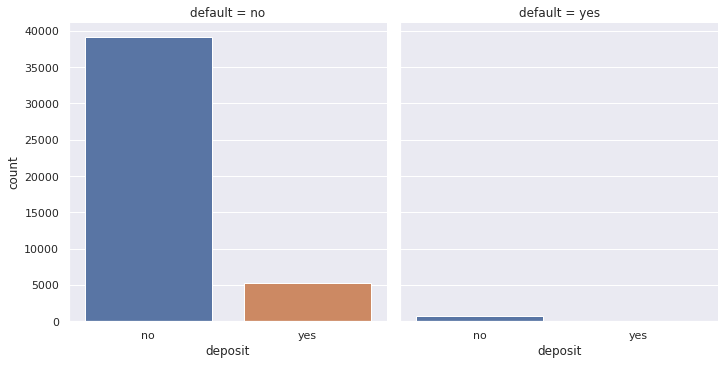

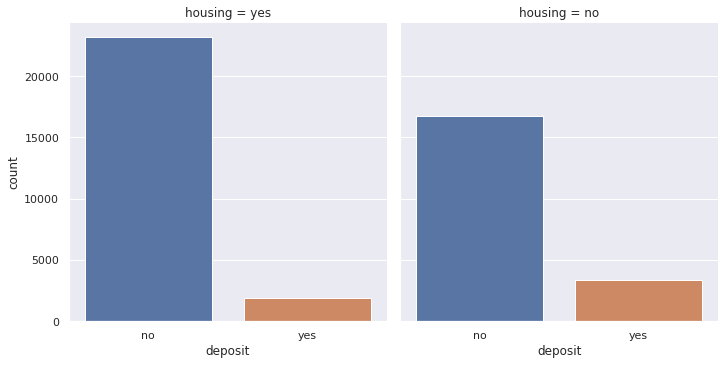

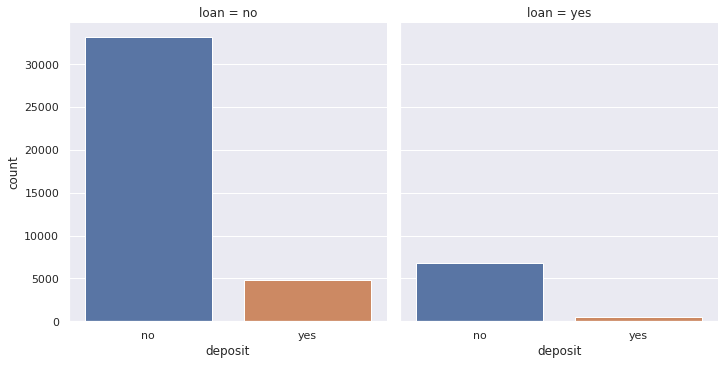

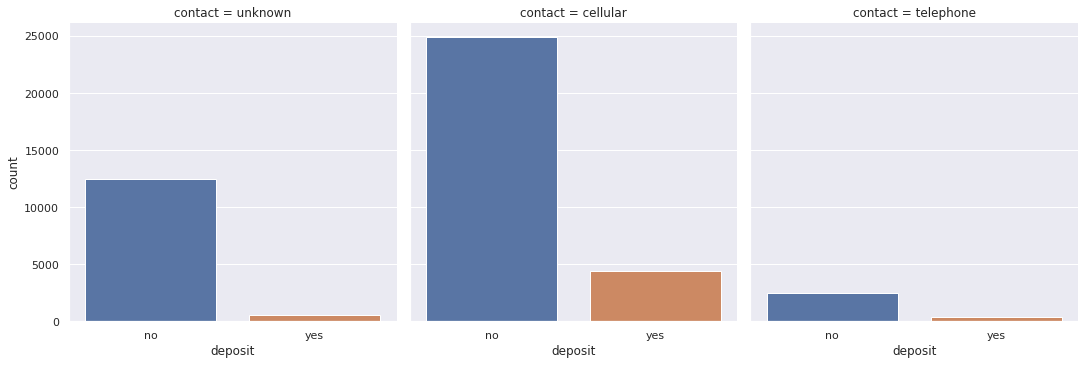

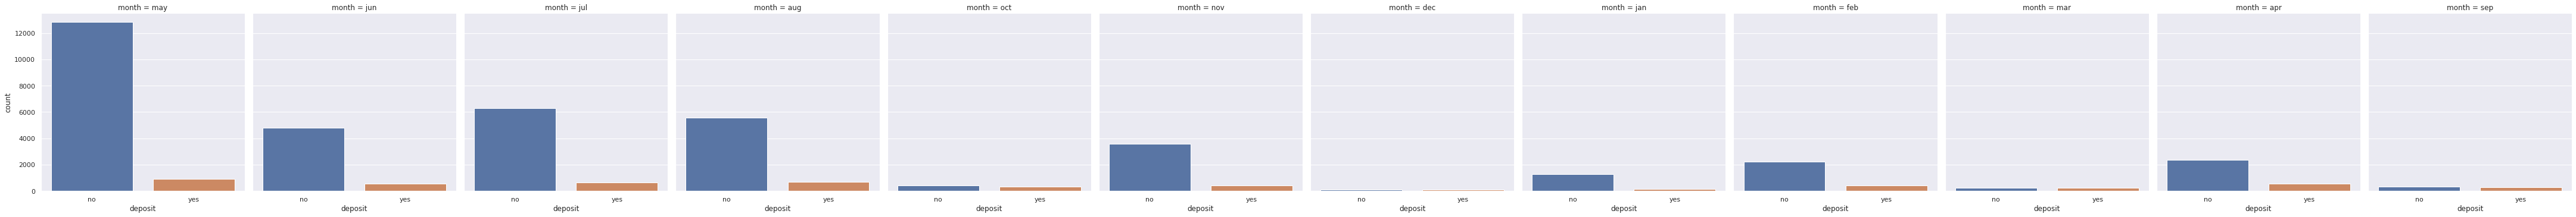

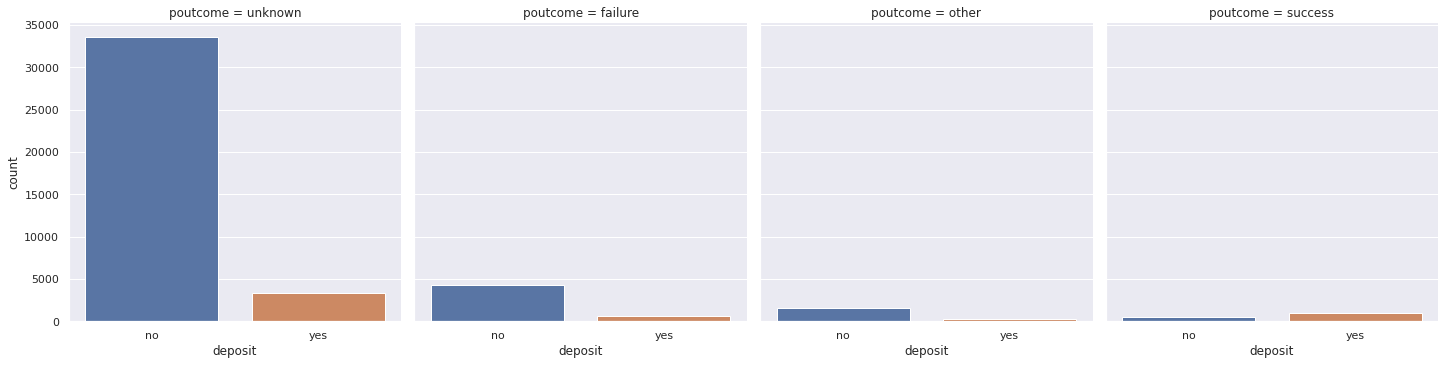

In [50]:
#find out the relation between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature,kind='count',data=df)
plt.show()

In [20]:
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

1 retired client has high interest on deposit

2 client who has housing loan seems to be not interested much on deposit

3 if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit

4 in month of March, September, October and December, client show high interest to deposit

5 in month of may, records are high but client interst ratio is very les


In [21]:
#list of numerical_variables
numerical_features=[feature for feature in df.columns if((df[feature].dtypes!='object')&(feature not in ['deposit']))]
print("number of numerical_variables: ",len(numerical_features))

number of numerical_variables:  6


In [22]:
#visualization of numerical variables
df[numerical_features].head()

,age,balance,day,duration,campaign,previous
0,58,2143,5,261,1,0
1,44,29,5,151,1,0
2,33,2,5,76,1,0
3,47,1506,5,92,1,0
4,33,1,5,198,1,0


In [23]:
#discrete features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variable count:{}".format(len(discrete_feature)))

Discrete variable count:0


In [24]:
#continous feature
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("continuous feature:{}".format(len(continuous_features)))

continuous feature:6


/home/zammath/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zammath/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zammath/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

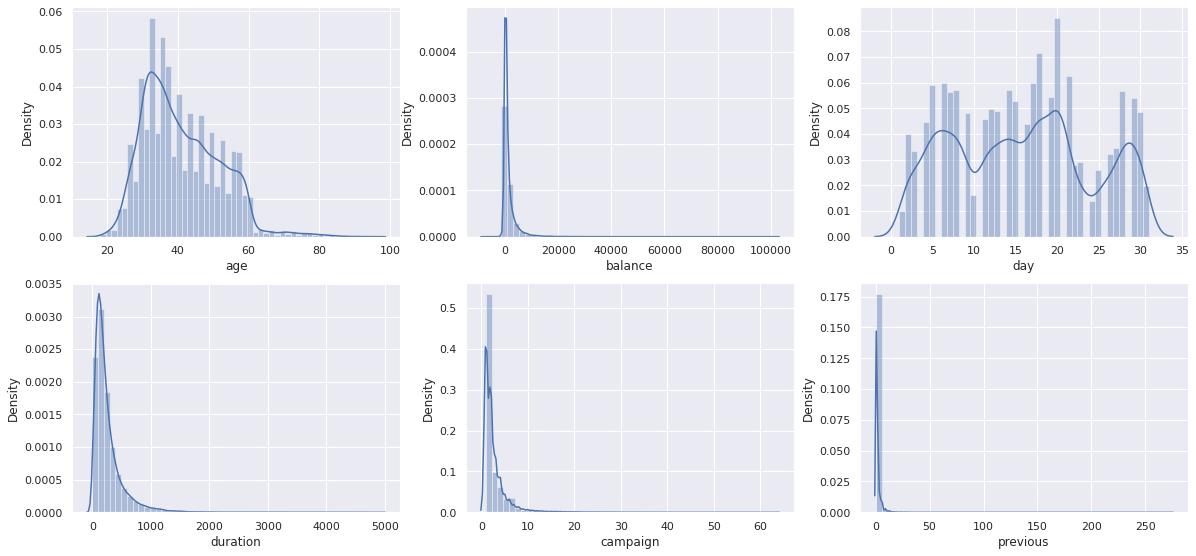

In [51]:
#plot a univariate distribution of continous observation
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

1 age days distributed normally

2 balance duration campaign days  and previous heavily skewed towardsleft and seems to be have some outliers

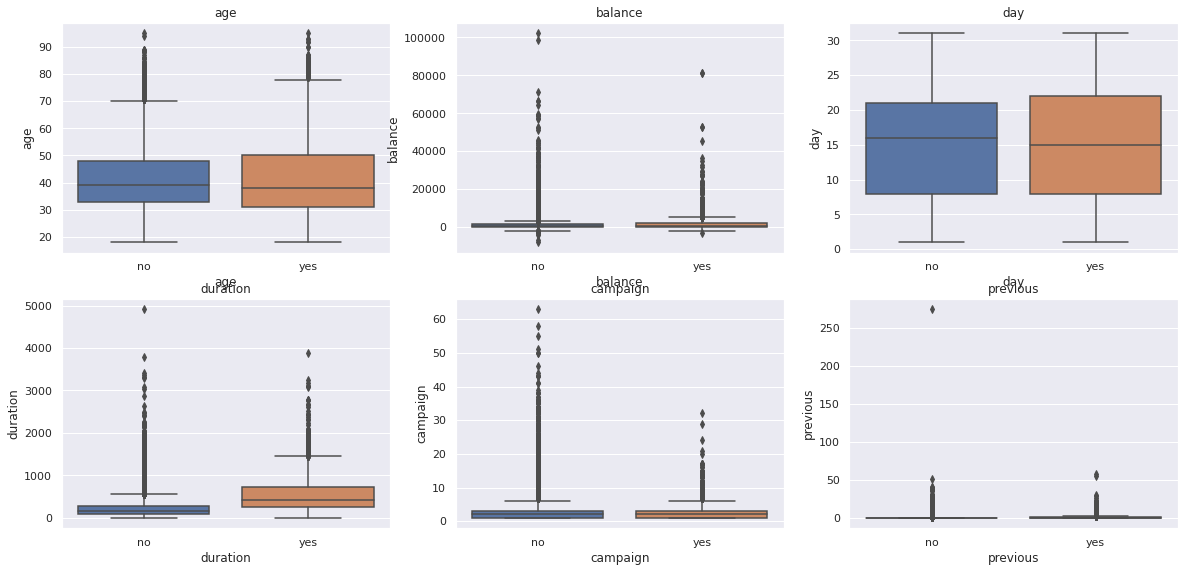

In [26]:
#Relation between contionus numerical features and labels
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='deposit',y=df[feature],data=df)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/zammath/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/zammath

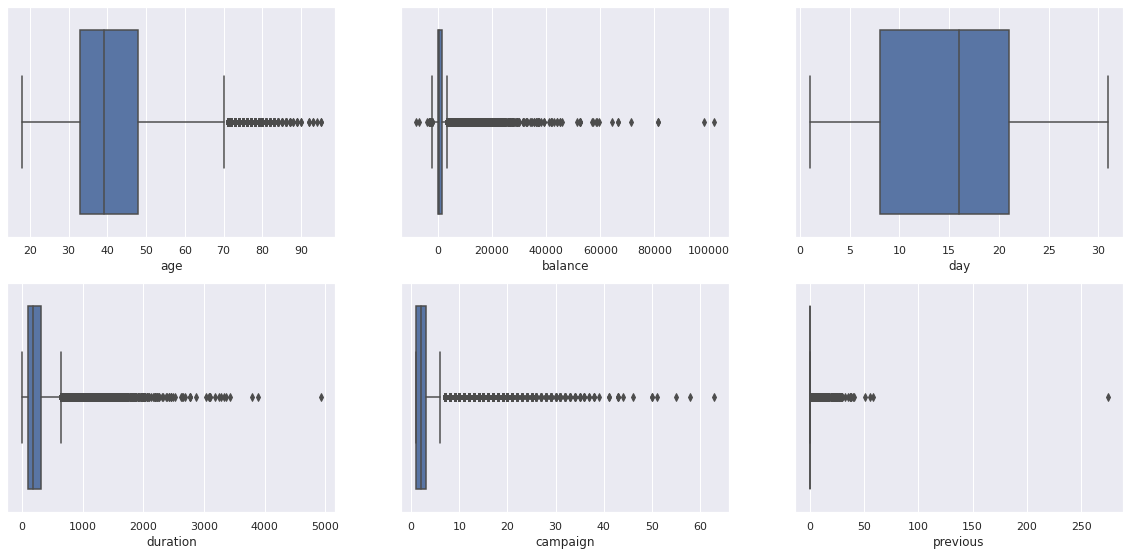

In [27]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

age,balance,duration,campaign and previous has some outliers

In [28]:
#Explore the correlation between numerical feature

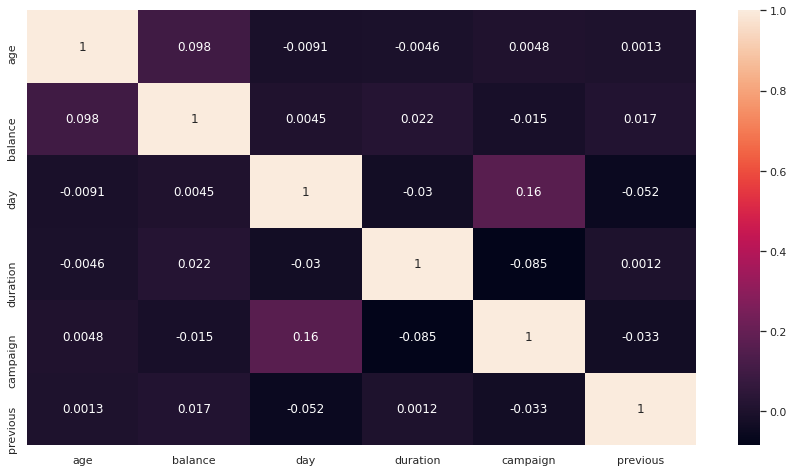

In [29]:
cor=df.corr()
plt.figure(figsize=(15, 8))

sns.heatmap(cor,annot=True)

plt.show()

it seems no feature is heavily correlated with other features

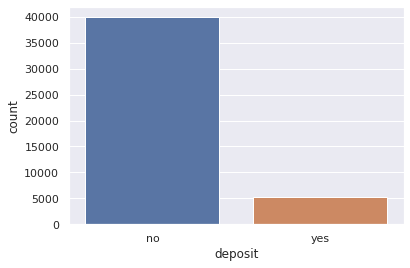

In [30]:
#Check the dataset is balanced or not balanced target values classification
sns.countplot(x='deposit',data=df)
plt.show()

In [31]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

given dataset seems to be unbalanced

In [33]:
df2.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


In [34]:
df2.shape

(45211, 16)

In [35]:
#default feature does not play an important role
df2.groupby(df['default']).size()

default
no     44396
yes      815
dtype: int64

In [36]:
df2.drop(['default'],axis=1,inplace=True)

In [37]:
#remove outliers in feature age
df2.groupby('age',sort=True)['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [38]:
df2.groupby(['deposit','balance'])['balance'].count()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

In [39]:
df2.groupby(['deposit','duration'])['duration'].count()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

In [40]:
df2.groupby(['deposit','campaign'])['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [41]:
df3=df2[df2['campaign']<33]

In [42]:
df3.groupby(['deposit','campaign'])['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5

In [43]:
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           33532
         1            2189
         2            1650
         3             848
         4             543
                     ...  
yes      26              1
         29              1
         30              1
         55              1
         58              1
Name: previous, Length: 66, dtype: int64

In [44]:
df4=df3[df3['campaign']<31]

In [45]:
cat_columns=['job','marital','education','contact','month','poutcome']

In [46]:
df4

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,0,unknown,no


In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df4['job']= le.fit_transform(df4['job'])

le1=LabelEncoder()
df4['marital']= le1.fit_transform(df4['marital'])

le1=LabelEncoder()
df4['education']= le1.fit_transform(df4['education'])


le3=LabelEncoder()
df4['housing']= le3.fit_transform(df4['housing'])

le4=LabelEncoder()
df4['loan']= le4.fit_transform(df4['loan'])

le5=LabelEncoder()
df4['contact']= le5.fit_transform(df4['contact'])

le6=LabelEncoder()
df4['month']= le6.fit_transform(df4['month'])

le7=LabelEncoder()
df4['poutcome']= le7.fit_transform(df4['poutcome'])

le8=LabelEncoder()
df4['deposit']= le8.fit_transform(df4['deposit'])

/tmp/ipykernel_26609/533306164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['job']= le.fit_transform(df4['job'])
/tmp/ipykernel_26609/533306164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['marital']= le1.fit_transform(df4['marital'])
/tmp/ipykernel_26609/533306164.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [48]:
df4

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,4,1,2,2143,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,29,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,2,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,1506,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,1,0,0,2,5,8,198,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,0,17,9,977,3,0,3,1
45207,71,5,0,0,1729,0,0,0,17,9,456,2,0,3,1
45208,72,5,1,1,5715,0,0,0,17,9,1127,5,3,2,1
45209,57,1,1,1,668,0,0,1,17,9,508,4,0,3,0
